## Package Importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Buisiness & Data Understanding

In [2]:
df=pd.read_excel("/content/Students' well-being survey.xlsx")
df.head()

,Horodateur,Age,University,Gender,overall educational system,educational quality in your university,educational rhythm,avg number of hours per day,satisfaction with the subjects,\noverwhelmed during revision period,...,school affecting your everyday mood,mental health contributing in overall well-being,overall physical health,exercising,hours of sleep per night,use of tobacco or similar substances,headaches or muscle tension during periods of stress,tired after a day at the university,energy levels lately,physical health contributing to overall well-being
0,2023-12-07 01:55:18.350,23,ENIS,Male,4,3,Very accelerated,8,Neutral,Yes,...,Often,7,7,Sometimes,4 to 7,Often,Yes,Always,Low,7
1,2023-12-07 01:55:38.064,23,ENIS,Male,6,7,Accelerated,7,Satisfied,Yes,...,Sometimes,7,7,Sometimes,7 to 9,Never,No,Often,Moderate,7
2,2023-12-07 01:56:06.542,22,ENIS,Female,5,6,Accelerated,7,Neutral,Yes,...,Often,7,6,Never,4 to 7,Never,Yes,Usually,Low,6
3,2023-12-07 01:56:48.161,22,ENIS,Female,5,6,Accelerated,7,Neutral,Yes,...,Sometimes,7,6,Sometimes,4 to 7,Never,No,Usually,Moderate,6
4,2023-12-07 01:56:58.914,22,ENIS,Male,6,5,Accelerated,8,Not satisfied,Yes,...,Often,7,6,Sometimes,4 to 7,Sometimes,Yes,Often,High,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Horodateur                                                                         113 non-null    datetime64[ns]
 1   Age                                                                                113 non-null    object        
 2   University                                                                         113 non-null    object        
 3   Gender                                                                             113 non-null    object        
 4   overall educational system                                                         113 non-null    int64         
 5   educational quality in your university                   

## Data preparation

In [4]:
df.University.unique()

array(['ENIS', 'Enis', 'ISSIS', 'Issisfax',
       'National School of engeeniring of sfax(ENIS)',
       'Faculté de Médecine Sfax ', 'Issis', 'enis', 'ENISO',
       "Ecole nationale d'ingénierie sfax ", 'Rnis ',
       'Engineering school of sfax ',
       'institut supérieur de gestion de Tunis ', 'ISIMS', 'FSS',
       'ESPRIT', 'Enetcom', 'ISIGK ', 'Esprit', 'enetcom', 'IPEIS',
       'ipeis', 'ipein', 'ENIS ', 'Ipeis ', 'ipeit ', 'Ipeis', 'ipeim',
       'universite de sfax'], dtype=object)

In [5]:
df['University'].replace({"Enis": "ENIS",
                          "National School of engeeniring of sfax(ENIS)": "ENIS" ,
                          "enis": "ENIS",
                          "Ecole nationale d'ingénierie sfax ": "ENIS",
                          "Rnis ": "ENIS",
                          "Engineering school of sfax ": "ENIS",
                          "institut supérieur de gestion de Tunis ":"ISG",
                          "Issisfax": "ISSIS",
                          "enetcom" : "Enetcom",
                          "Ipeis": "IPEIS",
                          "Ipeis ": "IPEIS",
                          "ipeis": "IPEIS",
                          "'Esprit'":"ESPRIT",
                          "Issis": "ISSIS",}, inplace=True)

In [6]:
df.University.unique()

array(['ENIS', 'ISSIS', 'Faculté de Médecine Sfax ', 'ENISO', 'ISG',
       'ISIMS', 'FSS', 'ESPRIT', 'Enetcom', 'ISIGK ', 'Esprit', 'IPEIS',
       'ipein', 'ENIS ', 'ipeit ', 'ipeim', 'universite de sfax'],
      dtype=object)

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Age', 'University', 'Gender', 'educational rhythm', 'satisfaction with the subjects', '\noverwhelmed during revision period ', 'engagement with clubs or organizations', 'balancing your time', 'spend time with friends during breaks', 'How often do you feel stressed', 'feeling overwhelmed when you have so much to do', 'feelings of loneliness or isolation recently', 'talk to someone or get help when overwhelmed', 'managing stress in daily life', 'school affecting your everyday mood', 'exercising', 'hours of sleep per night', 'use of tobacco or similar substances', 'headaches or muscle tension during periods of stress', 'tired after a day at the university', 'energy levels lately']


In [8]:
df.Age.unique()

array([23, 22, 21, 20, 19, 24, '21ans '], dtype=object)

In [9]:
df['Age'].replace({"21ans ":21}, inplace=True)

In [10]:
df['Age'] = df['Age'].astype(int)

In [11]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features
# categorical_features[:]

['University',
 'Gender',
 'educational rhythm',
 'satisfaction with the subjects',
 '\noverwhelmed during revision period ',
 'engagement with clubs or organizations',
 'balancing your time',
 'spend time with friends during breaks',
 'How often do you feel stressed',
 'feeling overwhelmed when you have so much to do',
 'feelings of loneliness or isolation recently',
 'talk to someone or get help when overwhelmed',
 'managing stress in daily life',
 'school affecting your everyday mood',
 'exercising',
 'hours of sleep per night',
 'use of tobacco or similar substances',
 'headaches or muscle tension during periods of stress',
 'tired after a day at the university',
 'energy levels lately']

In [12]:
categorical_features=categorical_features[2:]
categorical_features

['educational rhythm',
 'satisfaction with the subjects',
 '\noverwhelmed during revision period ',
 'engagement with clubs or organizations',
 'balancing your time',
 'spend time with friends during breaks',
 'How often do you feel stressed',
 'feeling overwhelmed when you have so much to do',
 'feelings of loneliness or isolation recently',
 'talk to someone or get help when overwhelmed',
 'managing stress in daily life',
 'school affecting your everyday mood',
 'exercising',
 'hours of sleep per night',
 'use of tobacco or similar substances',
 'headaches or muscle tension during periods of stress',
 'tired after a day at the university',
 'energy levels lately']

# Encoding

In [13]:
label_encoder = LabelEncoder()
for cat_feature in categorical_features:
  df[cat_feature] = label_encoder.fit_transform(df[cat_feature])

In [14]:
df.head()

,Horodateur,Age,University,Gender,overall educational system,educational quality in your university,educational rhythm,avg number of hours per day,satisfaction with the subjects,\noverwhelmed during revision period,...,school affecting your everyday mood,mental health contributing in overall well-being,overall physical health,exercising,hours of sleep per night,use of tobacco or similar substances,headaches or muscle tension during periods of stress,tired after a day at the university,energy levels lately,physical health contributing to overall well-being
0,2023-12-07 01:55:18.350,23,ENIS,Male,4,3,3,8,0,1,...,2,7,7,3,0,2,1,0,1,7
1,2023-12-07 01:55:38.064,23,ENIS,Male,6,7,0,7,2,1,...,3,7,7,3,1,1,0,2,2,7
2,2023-12-07 01:56:06.542,22,ENIS,Female,5,6,0,7,0,1,...,2,7,6,1,0,1,1,4,1,6
3,2023-12-07 01:56:48.161,22,ENIS,Female,5,6,0,7,0,1,...,3,7,6,3,0,1,0,4,2,6
4,2023-12-07 01:56:58.914,22,ENIS,Male,6,5,0,8,1,1,...,2,7,6,3,0,3,1,2,0,8


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Horodateur                                                                         113 non-null    datetime64[ns]
 1   Age                                                                                113 non-null    int64         
 2   University                                                                         113 non-null    object        
 3   Gender                                                                             113 non-null    object        
 4   overall educational system                                                         113 non-null    int64         
 5   educational quality in your university                   

In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [17]:
df.columns

Index(['Horodateur', 'Age', 'University', 'Gender',
       'overall educational system', 'educational quality in your university',
       'educational rhythm', 'avg number of hours per day',
       'satisfaction with the subjects',
       '\noverwhelmed during revision period ', 'support by your professors',
       'engagement with clubs or organizations',
       'the atmosphere of clubs/organizations ', 'balancing your time',
       'satisfaction with the social interactions and relationships within the university',
       'spend time with friends during breaks', 'overall mental well-being',
       'How often do you feel stressed',
       'feeling overwhelmed when you have so much to do',
       'feelings of loneliness or isolation recently',
       'talk to someone or get help when overwhelmed',
       'engagement in activities that positively impact mental health',
       'managing stress in daily life', 'school affecting your everyday mood',
       'mental health contributing in ov

## overall mental well-being

In [18]:
df_num_corr = df_num.corr()['overall mental well-being']
top_features = abs(df_num_corr[abs(df_num_corr) > 0.2]).sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 20 strongly correlated values with SalePrice:
overall mental well-being                                                            1.000000
overall physical health                                                              0.574931
educational quality in your university                                               0.531097
physical health contributing to overall well-being                                   0.490129
mental health contributing in overall well-being                                     0.489293
engagement in activities that positively impact mental health                        0.480595
feelings of loneliness or isolation recently                                         0.381388
overall educational system                                                           0.363611
tired after a day at the university                                                  0.358866
satisfaction with the social interactions and relationships within the university    0.346136
How o

In [19]:
top_features_list=list(dict(top_features).keys())

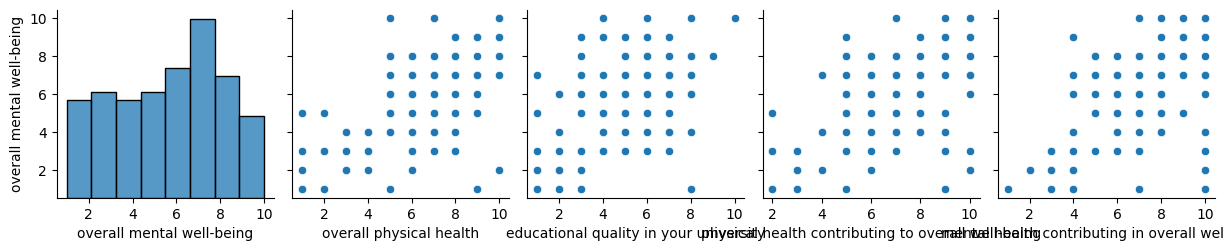

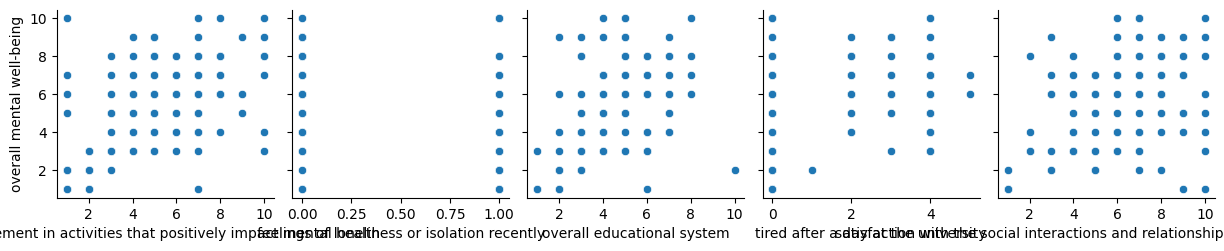

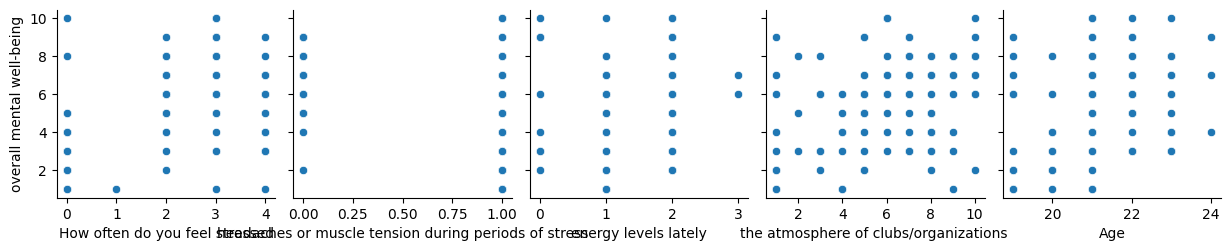

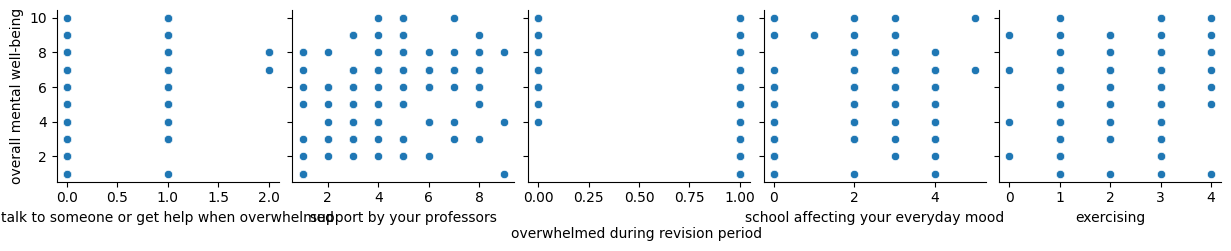

In [20]:
for i in range(0, len(top_features_list), 5):
    sns.pairplot(data=df_num,
                x_vars=top_features_list[i:i+5],
                y_vars=['overall mental well-being'])

## overall physical health

In [21]:
df_num_corr = df_num.corr()['overall physical health']
top_features = abs(df_num_corr[abs(df_num_corr) > 0.2]).sort_values(ascending=False)
print("There is {} strongly correlated values with overall physical health:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with overall physical health:
overall physical health                                                              1.000000
physical health contributing to overall well-being                                   0.630713
overall mental well-being                                                            0.574931
mental health contributing in overall well-being                                     0.562511
satisfaction with the social interactions and relationships within the university    0.415462
feelings of loneliness or isolation recently                                         0.406038
engagement in activities that positively impact mental health                        0.398969
educational quality in your university                                               0.379381
the atmosphere of clubs/organizations                                                0.310969
overall educational system                                                           

In [22]:
top_features_list=list(dict(top_features).keys())

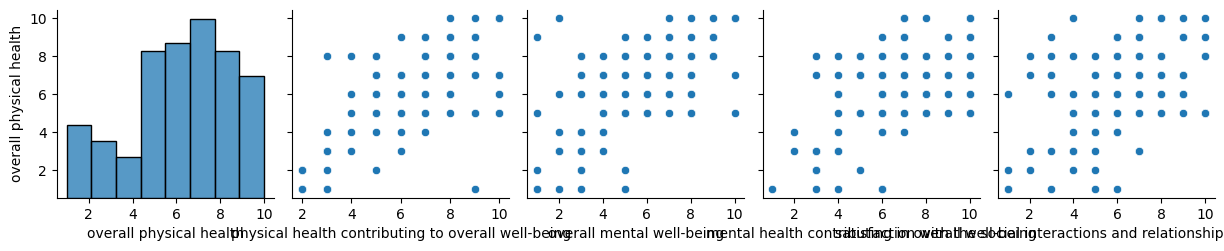

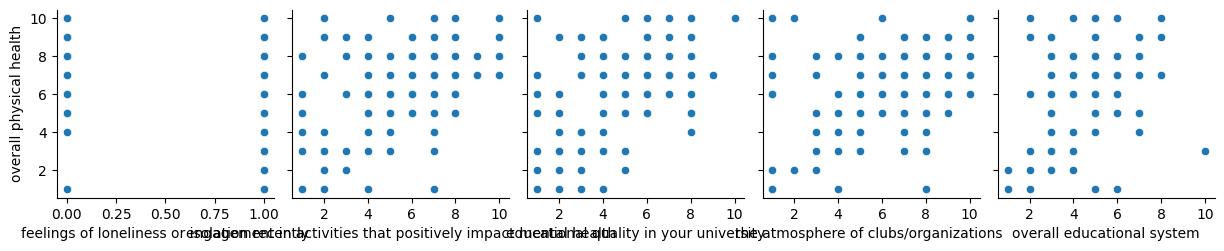

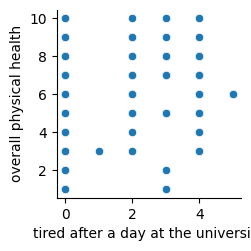

In [23]:
for i in range(0, len(top_features_list), 5):
    sns.pairplot(data=df_num,
                x_vars=top_features_list[i:i+5],
                y_vars=['overall physical health'])

In [24]:
df_num_corr = df_num.corr()['overall educational system']
top_features = abs(df_num_corr[abs(df_num_corr) > 0.2]).sort_values(ascending=False)
print("There is {} strongly correlated values with overall physical health:\n{}".format(len(top_features), top_features))

There is 13 strongly correlated values with overall physical health:
overall educational system                                                           1.000000
educational quality in your university                                               0.680901
support by your professors                                                           0.520991
physical health contributing to overall well-being                                   0.386980
overall mental well-being                                                            0.363611
engagement in activities that positively impact mental health                        0.302152
managing stress in daily life                                                        0.288699
mental health contributing in overall well-being                                     0.285035
satisfaction with the social interactions and relationships within the university    0.284576
the atmosphere of clubs/organizations                                                

In [25]:
top_features_list=list(dict(top_features).keys())

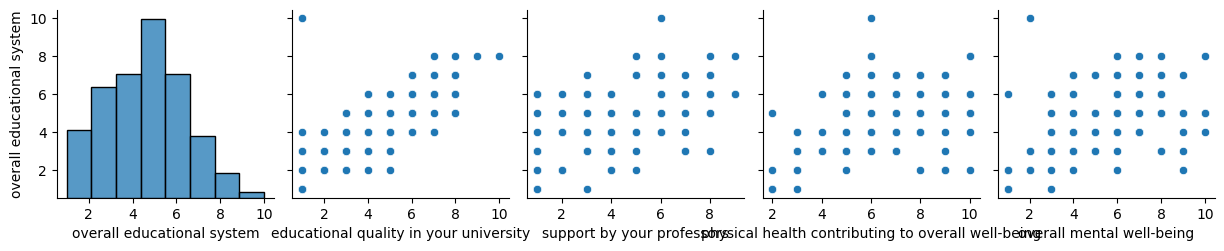

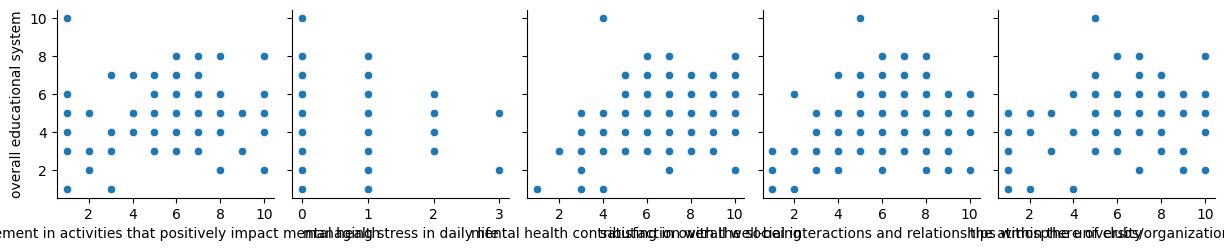

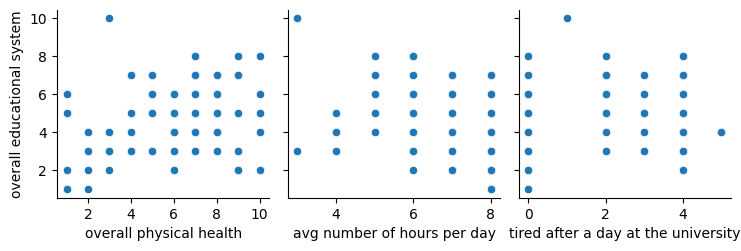

In [26]:
for i in range(0, len(top_features_list), 5):
    sns.pairplot(data=df_num,
                x_vars=top_features_list[i:i+5],
                y_vars=['overall educational system'])